<a href="https://colab.research.google.com/github/LeJ-04/amazon-products-rating-ml-project/blob/main/ProjetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Amazon Product Rating Prediction**
## Sentiment Analysis & Regression Pipeline
**Authors:** Jeffrey & Gabriel  
**Context:** This project predicts product ratings based on price, category, and user reviews using Natural Language Processing (NLP) and Machine Learning (ML) models.

# **1. Setup and Data Loading**

## 1.1 Libraries and Configuration

In [66]:
!git clone https://github.com/LeJ-04/amazon-products-rating-ml-project.git
%cd amazon-products-rating-ml-project

Cloning into 'amazon-products-rating-ml-project'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 2.39 MiB | 6.18 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/amazon-products-rating-ml-project/amazon-products-rating-ml-project


Libraries

In [67]:
# Mandatory libraries for data manipulation
import pandas as pd
import numpy as np

# Text processing and cleaning
import re
import string

# Language detection for filtering non-English reviews
!pip install langdetect -q  # (the-q is to install quietly)
from langdetect import detect, DetectorFactory, LangDetectException
import warnings

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Models and evaluations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configuration
DetectorFactory.seed = 0
warnings.filterwarnings("ignore")

In [68]:
data_original = pd.read_csv('amazon.csv')
data = data_original.copy()

# **2. Data Cleaning and Standardization**

## 2.1 Data Analysis

In [69]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [71]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

The type of all the values is object for all the columns.
The values in the 'rating' column are objects and not float because of the symbol '₹'. We need to convert this column to get numeric values.  

In [72]:
data.describe(include='all')['product_name']

,product_name
count,1465
unique,1337
top,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat..."
freq,5


Among these 1465 products, 1337 are unique.

In [73]:
data.describe(include='all')['rating']

,rating
count,1465
unique,28
top,4.1
freq,244


As the values in the rating column are objects, we can't observe the min, max and mean of the rating. We need to transform them with a function.

In [74]:
data.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


We notice that the values are missing in the 'rating_count' (2).

We check if rating, review_title and review_content have missing values. It is crucial to clean the dataset, otherwise the NLP part won't work (we already saw but we use different methods better for the visualization).

In [75]:
nb_missing_rating = data['rating'].isna().sum()
print("missing rating ?",  nb_missing_rating)
nb_missing_review_title = data['review_title'].isna().sum()
print("missing review_title ?", nb_missing_review_title)
nb_missing_review_content = data['review_content'].isna().sum()
print("missing review_content ?", nb_missing_review_content)

missing rating ? 0
missing review_title ? 0
missing review_content ? 0


In [76]:
display("Actual price column", data.actual_price.head())
display("Discounted price column", data.discounted_price.head())
display("Rating count column", data.rating_count.head())

'Actual price column'

,actual_price
0,"₹1,099"
1,₹349
2,"₹1,899"
3,₹699
4,₹399


'Discounted price column'

,discounted_price
0,₹399
1,₹199
2,₹199
3,₹329
4,₹154


'Rating count column'

,rating_count
0,"24,269"
1,"43,994"
2,"7,928"
3,"94,363"
4,"16,905"


## 2.2 Handling Formatting and Data Types

Like we said, certains columns are not in the right format. For the data manipulation, we need to transform the data type, especially in the actual price, discounted price and the rating count to change the type from object  into numerical values.  

We define a function to parse Indian Rupee strings (e.g., '₹1,099') into floats.
It removes the symbol '₹' and commas, handling potential errors gracefully.



In [77]:
def clean_currency(x):
    if isinstance(x, str):
        x = x.replace('₹', '').replace(',', '').strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

we apply cleaning to numerical variables

In [78]:
data['discounted_price'] = data['discounted_price'].apply(clean_currency)
data['actual_price'] = data['actual_price'].apply(clean_currency)
data['rating_count'] = data['rating_count'].apply(clean_currency)

In [79]:
display("Columns after cleaning the columns")
display("Actual price column", data.actual_price.head())
display("Discounted price column", data.discounted_price.head())
display("Rating count column", data.rating_count.head())

'Columns after cleaning the columns'

'Actual price column'

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0


'Discounted price column'

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0


'Rating count column'

,rating_count
0,24269.0
1,43994.0
2,7928.0
3,94363.0
4,16905.0


In [80]:
data.discount_percentage.head()

,discount_percentage
0,64%
1,43%
2,90%
3,53%
4,61%


We need also to to get the discount percentage column into nummerical column.

In [81]:
data['discount_percentage'] = data['discount_percentage'].astype(str).str.replace('%', '').astype(float)
data.discount_percentage.head()

,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0


We also clean the rating column (handling any non-numeric chars).

In [82]:
data.rating.isna().sum()

np.int64(0)

In [83]:
for i,r in enumerate(data.rating):
    if type(r) is not str:
      print("index:",i, "| rating:", r)

In [84]:
data['rating'] = pd.to_numeric(data['rating'].astype(str).str.replace('|', '', regex=False), errors='coerce')
data.rating.head()

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2


In [85]:
data.rating.isna().sum()

np.int64(1)

Here, after applying the function in the rating column, we identify 1 missing value. Therefore, we drop rows where critical text and numeric values are missing (even if we already check for the review content and review title.)

In [86]:
data.dropna(subset=['rating', 'review_content', 'review_title'], inplace=True)

## 2.3 Missing Value Imputation (Median Strategy)

Like we said in the analysis data part, we detected 2 missing values in rating_count. Instead of dropping these rows, we use median. The median is preferred over the mean because rating_count likely has a skewed distribution (a few products with massive reviews), making the mean sensitive to outliers.

In [87]:
print("missing values in 'rating_count' (before): ",data.rating_count.isna().sum())

rating_count_median = data['rating_count'].median()
data['rating_count'] = data['rating_count'].fillna(rating_count_median)

print("missing values in 'rating_count' (after the filling):",data.rating_count.isna().sum())

missing values in 'rating_count' (before):  2
missing values in 'rating_count' (after the filling): 0


We don't need to handle text and rating missing values because there isn't missing values.

In [88]:
data.category.head()

,category
0,Computers&Accessories|Accessories&Peripherals|...
1,Computers&Accessories|Accessories&Peripherals|...
2,Computers&Accessories|Accessories&Peripherals|...
3,Computers&Accessories|Accessories&Peripherals|...
4,Computers&Accessories|Accessories&Peripherals|...


Here, the text (product's category) is unreadable so to fix it, we extract the root category in a new feature column.

In [89]:
data['main_category'] = data['category'].astype(str).str.split('|').str[0]
data.main_category.head()

,main_category
0,Computers&Accessories
1,Computers&Accessories
2,Computers&Accessories
3,Computers&Accessories
4,Computers&Accessories


## 2.4 Language Detection and Filtering


In this dataset, there are many review in different language, like hindi review. To ensure NLP model accuracy, we isolate English reviews.
We use the langdetect library to identify the language of each review.
Reviews that are non-English or too short (<10 chars) to reliably detect are flagged and removed to prevent noise in the model.

In [90]:
def detect_safe(text):
    if not isinstance(text, str) or len(text.strip()) < 10:
        return 'short_or_empty'
    try:
        return detect(text)
    except LangDetectException:
        return 'error'

In [91]:
data['language_rtitle'] = data['review_title'].apply(detect_safe)
data['language_rcontent'] = data['review_content'].apply(detect_safe)

display("Language review_title",data['language_rtitle'].value_counts())
display("Language review_content", data['language_rcontent'].value_counts())

'Language review_title'

,count
language_rtitle,
en,1461
pt,1
te,1
short_or_empty,1


'Language review_content'

,count
language_rcontent,
en,1462
te,1
hi,1


We can display the non-englsih reviews

In [92]:
non_english_rtitle = data[ (data['language_rtitle'] != 'en') & (data['language_rtitle'] != 'short_or_empty') ]
non_english_rcontent = data[ (data['language_rcontent'] != 'en') & (data['language_rcontent'] != 'short_or_empty') ]

for index, row in non_english_rtitle.iterrows():
    print("Index", index,":")
    print(f"\tReview Title: {row['review_title']}")
    print(f"\tReview Title language: {row['language_rtitle']}")
for index, row in non_english_rcontent.iterrows():
    print("Index", index,":")
    print(f"\tReview Content: {row['review_content']}")
    print(f"\tReview Content language:: {row['language_rcontent']}")

Index 155 :
	Review Title: do not buy
	Review Title language: pt
Index 1379 :
	Review Title: Water heating not good as per standard,నాకు ప్రొడక్ట్ ప్లగ్ డామేజ్ అయింది ఇప్పుడు రెండు నెలలు అయింది నాకు ప్రొడక్ట్ ప్లగ్ ఇప్పించగలరు,Good Product for Heating purpose,Good product,Easy , compact and quick solution,Ok product,Not worthy,Useful
	Review Title language: te
Index 323 :
	Review Content: Best but slow response from tv,Product is good,https://m.media-amazon.com/images/I/71Knz9n24GL._SY88.jpg,Value for money,Super quality....go with TCL,,Best price,చాలా బాగుంది కానీ యుాస్ బి పోర్ట్స్ లోపల కాకుండా బయటికి ఇస్తే బాగుంటుంది మరియు గుాగుల్ క్రోమ్ ఇన్ బుల్ట్ గా ఇస్తే బాగుంటుంది
	Review Content language:: te
Index 1331 :
	Review Content: Ok product 900/ma bast product A little family productNot resturant not hotel,No,Nice product,Good product,For Dry grinding of spices, motor heats up,👍,भाई कभी मत लेना नहीं तो पछतायो गे 6 महीना ईयूज किया हू और ये लोग वारंटी भी नहीं देते हैं कभी को कस्टमर नम्बर 

4 non-english or very short reviews. As there are only few ones, we can directly remove on the dataset. Hovewer, if there were more, we would apply a translation foe non-english reviews.  

In [93]:
indices_to_drop = [155, 1379, 323, 1331]
print(f"Shape before the removing of certains reviews: {data.shape}")
data.drop(indices_to_drop, inplace=True)
print(f"New shape of the DataFrame: {data.shape}")

Shape before the removing of certains reviews: (1464, 19)
New shape of the DataFrame: (1460, 19)


We observe that the full review isn't readable. To get a effective model, we need to provide it clean data that can be readable by the model. Therefore, we transform the text. The solution is a function that handles all the useless informations by removing them (remove brackets, URLs, words containing numbers).

We anticipate for the next part. Because we now that we will use model like NLP model, we try to gather the title reviews and the content reviws in single column.

In [94]:
data['full_review'] = data['review_title'].fillna('') + ' ' + data['review_content'].fillna('')
data['full_review'].head()

,full_review
0,"Satisfied,Charging is really fast,Value for mo..."
1,"A Good Braided Cable for Your Type C Device,Go..."
2,"Good speed for earlier versions,Good Product,W..."
3,"Good product,Good one,Nice,Really nice product..."
4,"As good as original,Decent,Good one for second..."


We add the review length and the word count based on full review text for more features.

In [95]:
data['review_len'] = data['full_review'].apply(len)
display(data.review_len.head())

data['word_count'] = data['full_review'].apply(lambda x: len(str(x).split()))
display(data.word_count.head())

,review_len
0,608
1,1368
2,409
3,584
4,2590


,word_count
0,74
1,228
2,30
3,95
4,432


**Data Cleaning and Preprocessing are now complete.**

In [96]:
print(f"Shape: {data.shape}")
print(f"Missing Values after imputation:\n{data.isnull().sum()}")

Shape: (1460, 22)
Missing Values after imputation:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
main_category          0
language_rtitle        0
language_rcontent      0
full_review            0
review_len             0
word_count             0
dtype: int64


# **3. Exploratory Data Analysis (EDA)**

## 3.1 Univariate Analysis (Distributions)

Set the aesthetic style of the plots

In [97]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

**FIGURE 1: Distribution of Product Ratings**

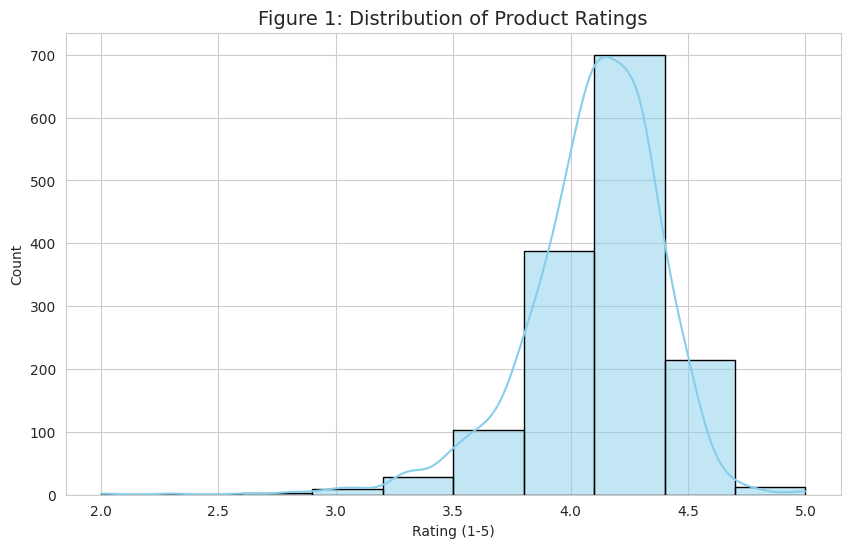

In [98]:
plt.figure()
sns.histplot(data['rating'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Figure 1: Distribution of Product Ratings', fontsize=14)
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.show()

The rating distribution is highly left-skewed, with the vast majority of products rated between 3.5 and 5.0. This class imbalance poses a challenge for regression models. They may struggle to learn the characteristics of bad products (ratings 1.0-2.0) due to lack of data.

**FIGURE 2: Distribution of Discounted Prices (Log Scale)**

We use log_scale=True as specified in the report to handle extreme price differences

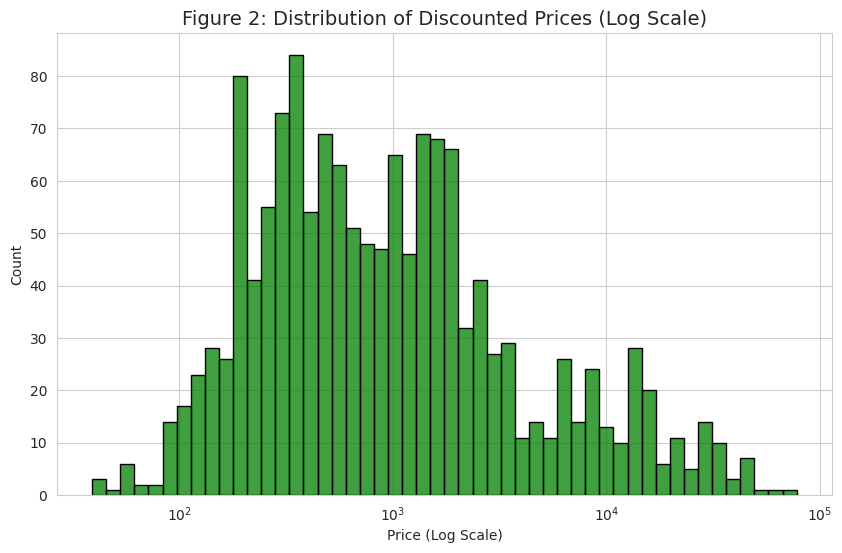

In [99]:
plt.figure()
sns.histplot(data['discounted_price'], bins=50, log_scale=True, color='green', edgecolor='black')
plt.title('Figure 2: Distribution of Discounted Prices (Log Scale)', fontsize=14)
plt.xlabel('Price (Log Scale)')
plt.ylabel('Count')
plt.show()

The raw price data spans several orders of magnitude (from ₹100 to ₹70,000+). By applying a Logarithmic Scale, we reveal a more normal distribution. This suggests that log_price will be a more effective feature for our model than the raw discounted_price.

## 3.2 Bivariate Analysis (Correlations & Price Impact)

We create a rounded rating column (e.g., 4.2 -> 4) for a better visualization

In [100]:
data['rating_rounded'] = data['rating'].round().astype(int)

**FIGURE 3: Impact of Promotions (Discount vs Rating)**

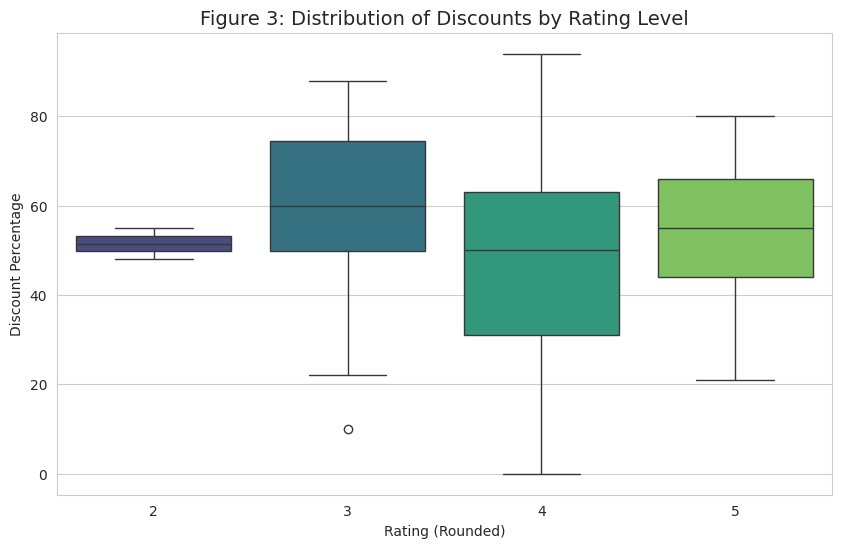

In [101]:
plt.figure()
sns.boxplot(x='rating_rounded', y='discount_percentage', data=data, palette='viridis')
plt.title('Figure 3: Distribution of Discounts by Rating Level', fontsize=14)
plt.xlabel('Rating (Rounded)')
plt.ylabel('Discount Percentage')
plt.show()

We tested the hypothesis that higher discounts lead to better ratings.
The correlation is quasi null. The median discount remains stable (around 50-55%) regardless of whether the product is rated 3, 4, or 5 stars.
Also, extreme discounts (>70%) are often associated with average ratings (3-4 stars) rather than perfect ones. This suggests that while promotions may drive sales volume, they are not sufficient to buy customer satisfaction.

**FIGURE 4: Price vs Rating Relationship**

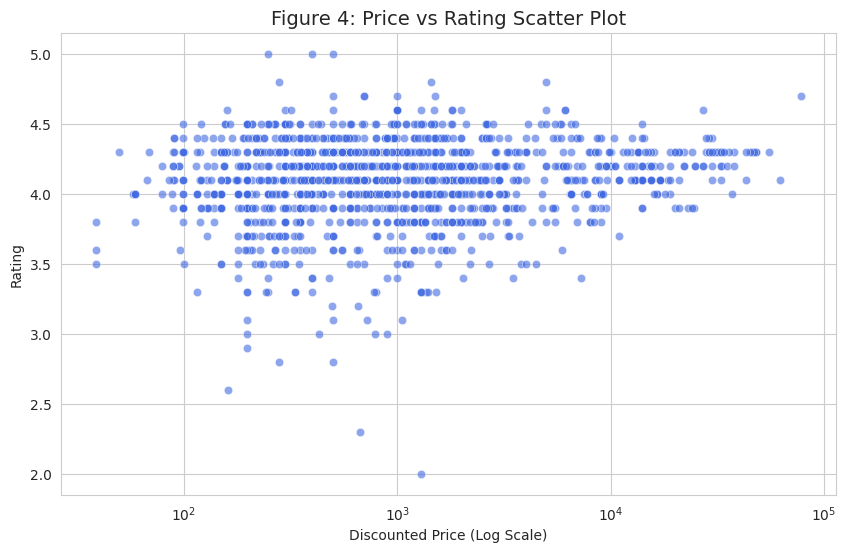

In [102]:
plt.figure()
sns.scatterplot(x='discounted_price', y='rating', data=data, alpha=0.6, color='royalblue')
plt.xscale('log')
plt.title('Figure 4: Price vs Rating Scatter Plot', fontsize=14)
plt.xlabel('Discounted Price (Log Scale)')
plt.ylabel('Rating')
plt.show()

The scatter plot shows a dispersed cloud with no linear trend. We observe low-priced products (₹200-500) with excellent ratings (4.5+), as well as expensive products with average ratings. This confirms that the price alone is not a sufficient predictor of quality.

**FIGURE 5: Impact of Popularity (Categories)**

We sum the 'rating_count' (popularity) by 'main_category'

In [103]:
category_popularity = data.groupby('main_category')['rating_count'].sum().sort_values(ascending=False).head(10)

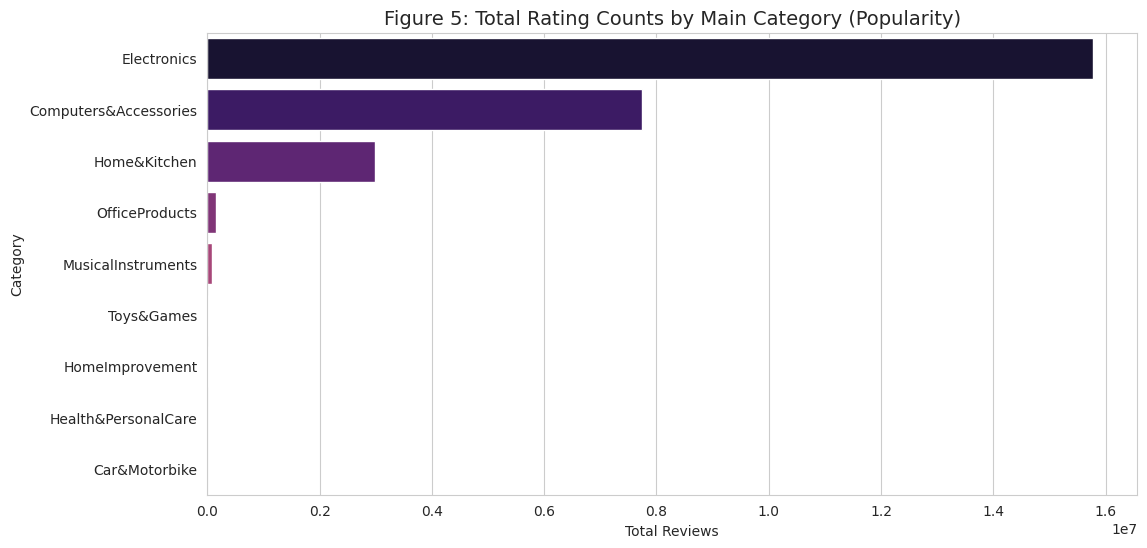

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_popularity.values, y=category_popularity.index, palette='magma')
plt.title('Figure 5: Total Rating Counts by Main Category (Popularity)', fontsize=14)
plt.xlabel('Total Reviews')
plt.ylabel('Category')
plt.show()

The Electronics category accumulates the largest volume of reviews, followed by Home & Kitchen. This "Social Proof" (volume of reviews) differs largely by category. Products categories may have fewer ratings, making them harder to predict compared to Electronics.

**FIGURE 6: Correlation Matrix**

Select only relevant numerical columns

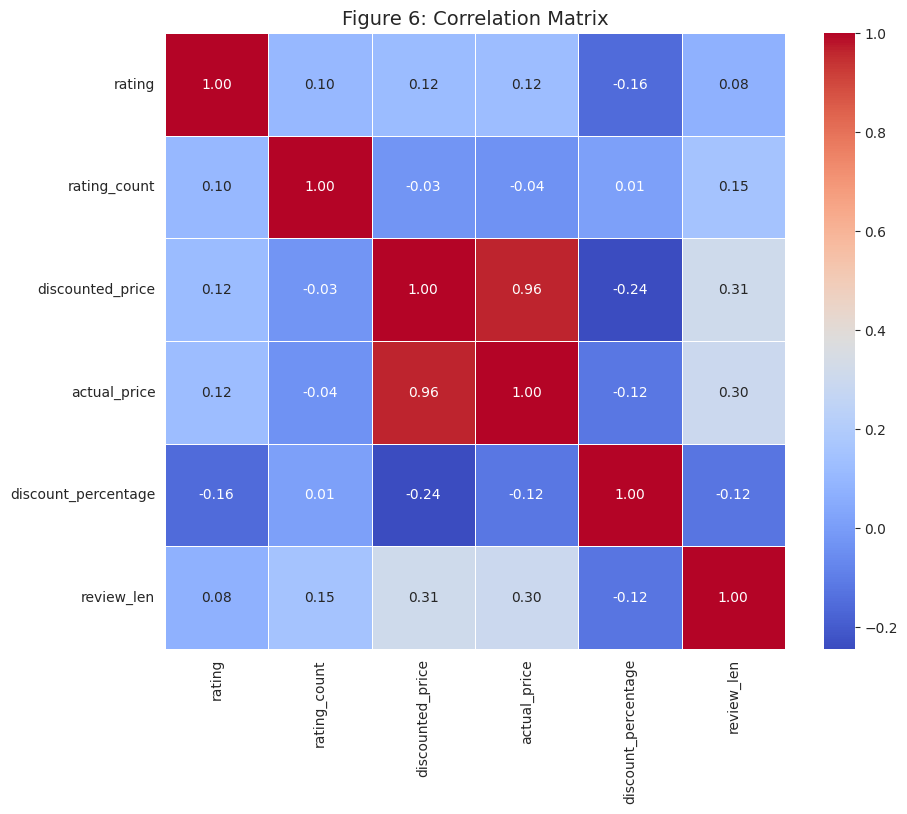

In [105]:
plt.figure(figsize=(10, 8))

numerical_cols = ['rating', 'rating_count', 'discounted_price', 'actual_price', 'discount_percentage', 'review_len']
corr_matrix = data[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 6: Correlation Matrix', fontsize=14)
plt.show()

The correlation matrix reveals two critical insights for our modeling strategy. We observe a near perfect correlation (0.96) between actual_price and discounted_price. This confirms they represent redundant information, justifying our decision to keep only discounted_price (transformed into log_price) to prevent model instability. The correlation between the target (rating) and all numerical variables is low (< 0.15). This strongly suggests that numerical data alone is insufficient to predict customer satisfaction, reinforcing the necessity of our NLP pipeline to extract sentiment from the text.

# **4. Feature Engineering and Preprocessing**

We utilize VADER (Valence Aware Dictionary and sEntiment Reasoner) to generate a sentiment score. Unlike simple polarity checkers, VADER is sensitive to intensity (e.g., "good" vs "GREAT!!") and emoticons, which are common in Amazon reviews.

We apply VADER to the raw review text to preserve punctuation and capitalization cues, generating a compound score from -1 (Negative) to +1 (Positive).

## 4.1 NLP Pipeline (Normalization & VADER Sentiment)

We download necessary NLTK lexicons (dictionaries), including VADER for sentiment analysis and WordNet for lemmatization.

In [106]:
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In this part, we define a function to clean the text by converting it to lowercase, removing special characters, and applying Lemmatization (converting words to their root form, e.g., "better" to "good").

In [107]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [108]:
def nlp_pipeline(text):
    text = str(text).lower() # Convert to string and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers (Normalization)
    words = text.split() # Tokenize (split by space)
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Remove stopwords and Lemmatize
    return " ".join(cleaned_words)

We apply this pipeline to create a processed_review column. This cleaned version is used later for counting significant words, while the raw text is kept for sentiment analysis.

In [109]:
data['processed_review'] = data['full_review'].apply(nlp_pipeline)

In [110]:
data.processed_review.head()

,processed_review
0,satisfiedcharging really fastvalue moneyproduc...
1,good braided cable type c devicegood quality p...
2,good speed earlier versionsgood productworking...
3,good productgood onenicereally nice productver...
4,good originaldecentgood one secondary usebest ...


We generate a sentiment_score ranging from -1 to +1 using the VADER tool. We apply this to the raw text (full_review) because VADER is optimized to interpret punctuation, capitalization, and emojis, which cleaning would remove.

In [111]:
sia = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return sia.polarity_scores(text)['compound']

In [112]:
data['sentiment_score'] = data['full_review'].apply(get_vader_score)

## 4.2 Feature Extraction (Log Price, Categories)

We apply a logarithmic transformation to discounted_price to create log_price. This reduces the impact of massive price differences and makes the distribution more normal (like we said, the price is from ₹100 to ₹70,000+)

In [113]:
data['log_price'] = np.log1p(data['discounted_price'])

We convert the categorical main_category column into binary columns (0 or 1) so the machine learning algorithms can process this non-numeric data : it is the One-Hot Encoding.

In [114]:
data = pd.get_dummies(data, columns=['main_category'], prefix='main_category_', drop_first=True)

We split the data into Training (80%) and Test (20%) sets. We use Stratified Shuffle Split on the rating variable to ensure both sets have the exact same proportion of high and low ratings, solving the class imbalance issue

## 4.3 Train/Test Split (Stratified)

In [115]:
data['rating_rounded'] = data['rating'].round().astype(int)

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(data, data['rating_rounded']):
    train_set = data.iloc[train_index]
    test_set = data.iloc[test_index]

print(f"Training Set Shape: {train_set.shape}")
print(f"Test Set Shape: {test_set.shape}")

Training Set Shape: (1168, 33)
Test Set Shape: (292, 33)


We apply StandardScaler to numerical variables (rating_count, sentiment_score, etc.). This gives them a mean of 0 and standard deviation of 1, preventing large numbers (like 10,000 reviews) from dominating the model.

In [116]:
scaler = StandardScaler()
num_cols = ['rating_count', 'sentiment_score', 'review_len', 'word_count']

train_set[num_cols] = scaler.fit_transform(train_set[num_cols])
test_set[num_cols] = scaler.transform(test_set[num_cols])

display(train_set[['rating', 'sentiment_score', 'log_price', 'word_count', 'review_len']].head())

,rating,sentiment_score,log_price,word_count,review_len
1152,4.1,0.335226,5.505332,-0.618523,-0.611008
288,3.8,-0.409784,8.987197,-0.218212,-0.234861
407,4.0,0.366503,4.605170,-0.350598,-0.398738
1317,4.4,-0.057608,8.593413,-0.464072,-0.421835
1338,4.2,0.384643,8.242756,0.106449,0.147334


# **5. Modeling Strategy and Training**

## 5.1 Model Definitions (Baseline to Ensemble)

We initialize linear regression (Baseline), random forest (Bagging) to capture non-linearities and gradient reinforcement (Scikit-Learn).
Instead of XGBoost which can be a powerful alternative, we opted for the implementation of Scikit-Learn (it’s the same thing but easier to implement).

In [117]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

We separate the features (X) from the target (y). We drop intermediate columns like full_review (text) and main_category (string) because the model only accepts the numerical vectors we created in Part 3. We use the scaled training data from the previous step.

In [118]:
train_set.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating,float64
rating_count,float64
about_product,object
user_id,object


In [119]:
cat_cols = [col for col in train_set.columns if col.startswith('main_category_')]
selected_features = ['log_price', 'sentiment_score', 'rating_count', 'review_len', 'word_count'] + cat_cols

X_train = train_set[selected_features]
y_train = train_set['rating']

X_test = test_set[selected_features]
y_test = test_set['rating']

## 5.2 Cross-Validation (5-Fold)

Instead of a single train/test split which can be lucky or unlucky, we split the training data into 5 Folds. We train 5 times and average the scores to get a reliable estimate of the model's stability. We use K-Fold (K=5) to evaluate performance stability before final testing.

We use negative MSE because scikit-learn maximizes scores (higher is better), but for error metrics, lower is better.

In [120]:
results = {}

for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'))

    results[name] = {
        "CV_RMSE": -cv_results['test_neg_root_mean_squared_error'].mean(),
        "CV_MAE": -cv_results['test_neg_mean_absolute_error'].mean(),
        "CV_R2": cv_results['test_r2'].mean()
    }
    print(f"{name} CV Complete.")

Linear Regression CV Complete.
Random Forest CV Complete.
Gradient Boosting CV Complete.


## 5.3 Final Evaluation on Test Set

Now we train on the full 80% training set and evaluate on the 20% hold-out test set to generate the final metrics. We calculate RMSE (penalizes large errors), MAE (average error), and $R^2$ (variance explained) to create the final comparison table.

In [121]:
final_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    final_results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

In [122]:
results_df = pd.DataFrame(final_results)
print("\nTable 1: Performance Metrics by Model")
display(results_df)


Table 1: Performance Metrics by Model


,Model,MAE,RMSE,R2
0,Linear Regression,0.205515,0.272720,0.041095
1,Random Forest,0.175990,0.249955,0.194500
2,Gradient Boosting,0.181324,0.252131,0.180412


We plot the bar chart of the visualization of the results.

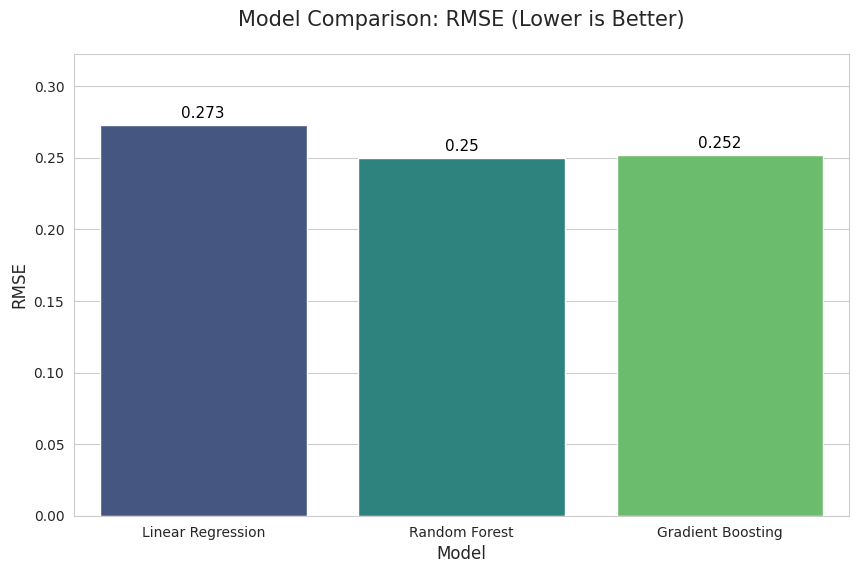

In [123]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('Model Comparison: RMSE (Lower is Better)', fontsize=15, pad=20)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Model', fontsize=12)

for index, row in results_df.iterrows():
  plt.text(index, row.RMSE + 0.005, round(row.RMSE, 3), color='black', ha="center", fontsize=11)

plt.ylim(0, results_df['RMSE'].max() + 0.05)
plt.show()

the Gradient Boosting model slightly outperforms Random
Forest and significantly outperforms Linear Regression across all metrics. With an MAE of 0.18,
the average error is less than one-fifth of a star. For instance, if the actual rating is 4.2, the model
will typically predict between 4.02 and 4.38.

# **6. Comparative Analysis of Results**

## 6.1 Feature Importance Analysis

Therefore, we retrieve the best model (Gradient Boosting) from the models dictionary.

In [124]:
best_model_name = "Gradient Boosting"
best_model = models[best_model_name]

We extract which variables the GradientBoostingRegressor model found most useful for prediction.

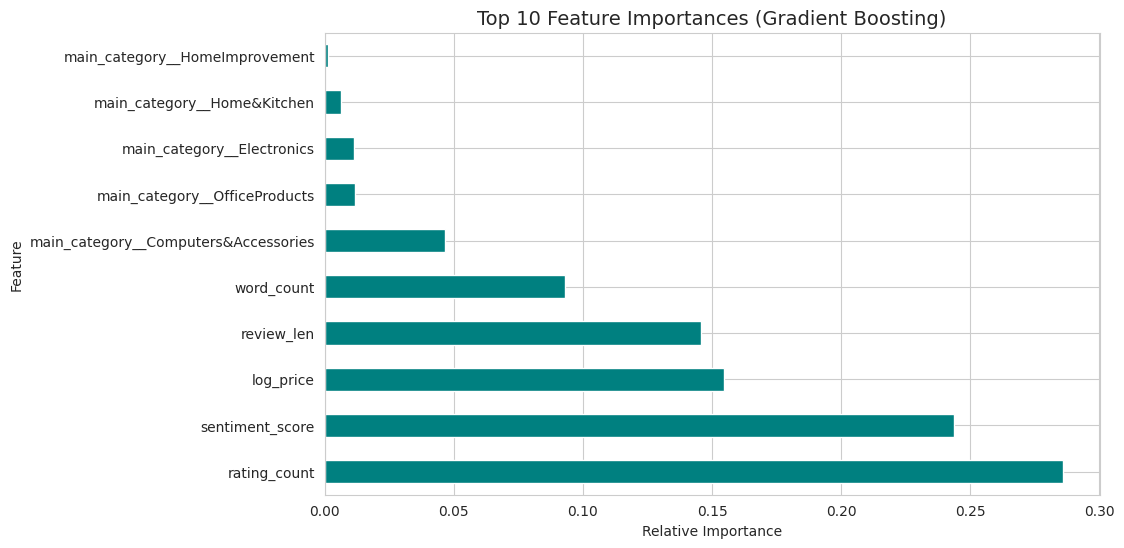

In [132]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances (Gradient Boosting)', fontsize=14)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

The rating_count (29%) is the most discriminating variable. It implies that products with a massive number of reviews tend to have a reliable rating, whereas products with few reviews exhibit much higher variance. Also, the The sentiment score (23%) is the second most important factor. This confirms that the textual content of reviews contains rich information that numerical features alone cannot capture. The length of the review is a strong indicator. Very short reviews often correlate with average/good ratings, while very long reviews tend to signal extreme experiences (either very passionate or very angry customers). Contrary to the initial hypothesis, price is not the sole decision factor. While relevant, it dictates customer satisfaction less than the social proof (count) or the perceived quality (sentiment).

## 6.2 Error Analysis (Actual vs. Predicted)

We visualize where the model makes mistakes. We plot the Actual rating (X-axis) against what the model Predicted (Y-axis)

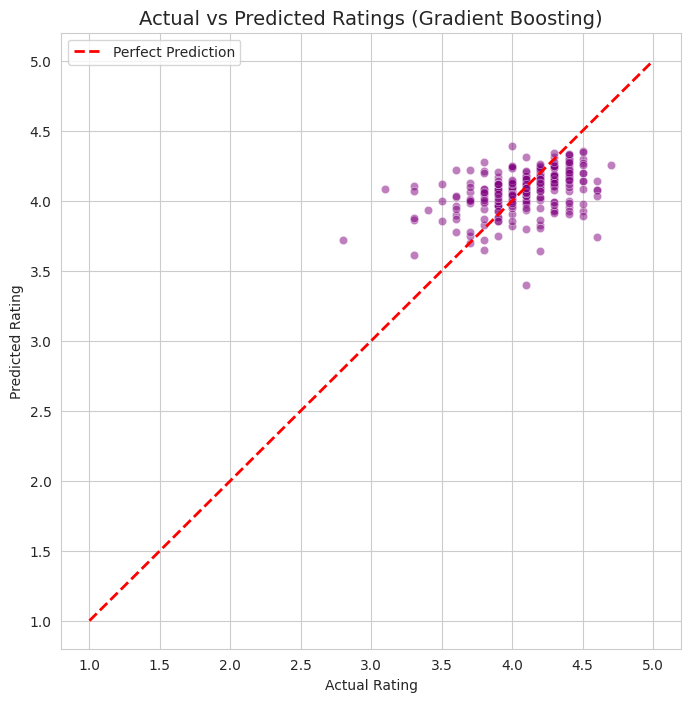

In [126]:
y_pred_gb = best_model.predict(X_test)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5, color='purple')

plt.plot([1.0, 5.0], [1.0, 5.0], 'r--', lw=2, label='Perfect Prediction')

plt.title(f'Actual vs Predicted Ratings ({best_model_name})', fontsize=14)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.legend()
plt.grid(True)
plt.show()

The points cluster densely around 4.0, which is the dataset's mean.
The model struggles to predict extreme ratings (1.0 or 5.0), often predicting closer to the average. This behavior minimizes RMSE but misses outliers. So, it rarely predicts a pure 1.0 or 5.0 because it prefers to play it safe around the average (4.0-4.2) to minimize error.